In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [ ]:
#accessing the dataset file stored in the Google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
!ls
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data
data.dtypes

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
heart_failure_clinical_records_dataset.csv  Untitled1.ipynb


,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [ ]:

norm_data = (data - data.min()) / (data.max() - data.min())
norm_data = norm_data.iloc[:, :13]
norm_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'ejection_fraction'}>],
       [<Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'serum_sodium'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >, <Axes: >]],
      dtype=object)

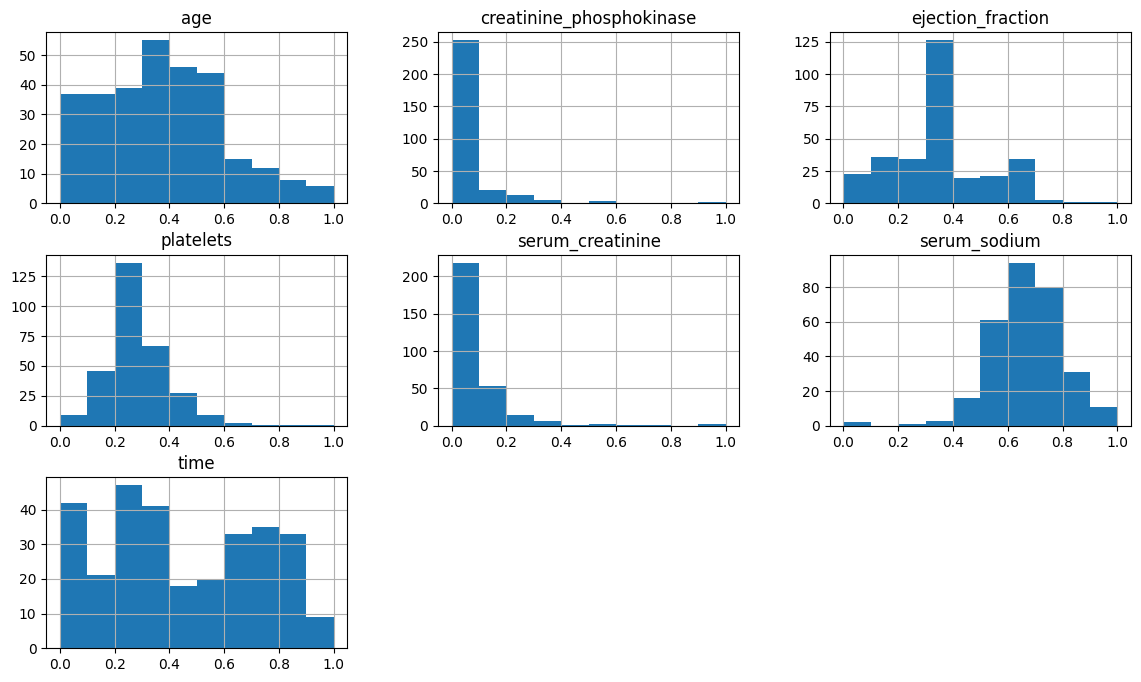

In [ ]:

columns_to_plot = [col for col in norm_data.columns if col not in ['high_blood_pressure', 'anaemia', 'diabetes', 'sex', 'DEATH_EVENT', 'smoking']]
norm_data[columns_to_plot].hist(figsize=(14,8))

In [ ]:
import plotly.express as px

fig1 = px.scatter_3d(norm_data, x='platelets', y='age', z='ejection_fraction', color='DEATH_EVENT',
                    title='3D Scatter Plot: Platelets vs. Age vs. Ejection_fraction')
fig1.show()

fig2 = px.scatter_3d(norm_data, x='time', y='serum_creatinine', z='serum_sodium', color='DEATH_EVENT',
                    title='3D Scatter Plot: Time vs. Serum Creatinine vs. Serum Sodium')
fig2.show()


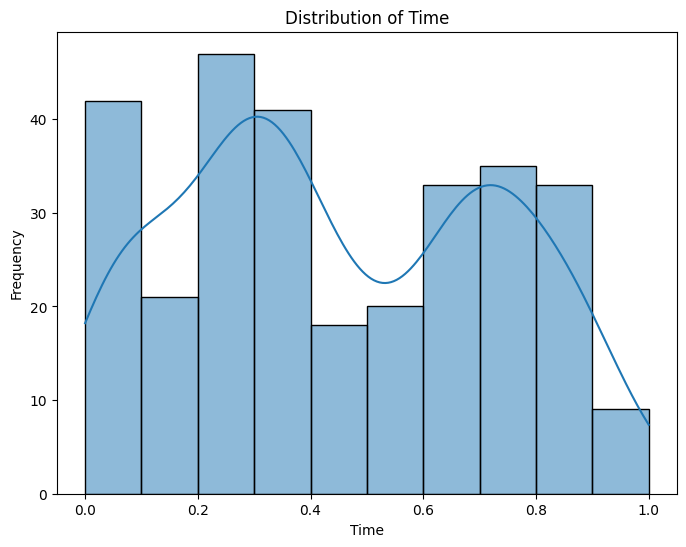

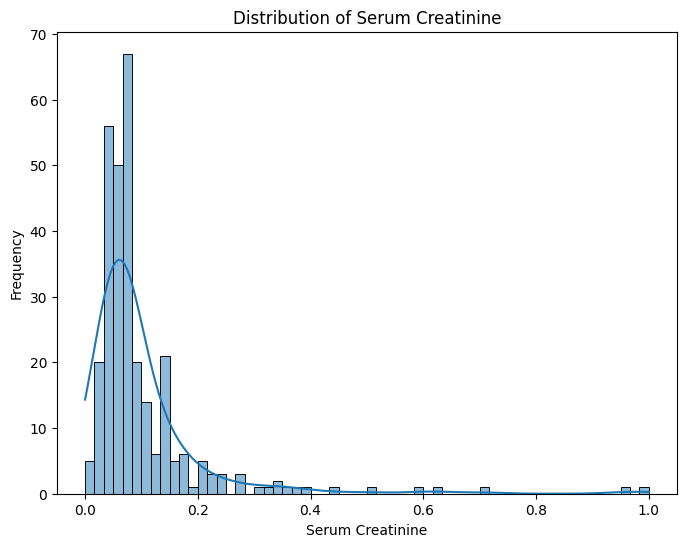

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(norm_data['time'], kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(norm_data['serum_creatinine'], kde=True)
plt.title('Distribution of Serum Creatinine')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.show()


In [ ]:
numerical_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                      'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
                      'smoking', 'time', 'DEATH_EVENT']
data_description = data[numerical_features].describe()
print(data_description)

for col in numerical_features:
    print(f"\nStatistics for {col}:")
    print(f"  Mean: {data[col].mean()}")
    print(f"  Median: {data[col].median()}")
    print(f"  Standard Deviation: {data[col].std()}")
    print(f"  Variance: {data[col].var()}")
    print(f"  Range: {data[col].max() - data[col].min()}")


[np.float64(0.6510741169392519), np.float64(0.5593268327296583), np.float64(0.42980990713649225), np.float64(0.41953963021191576)]


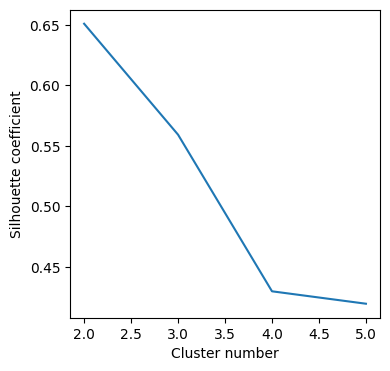

In [ ]:
#loading the necessay libraries
from sklearn.cluster import KMeans
from sklearn import metrics
#a dataset is selected for the clustering task, including 3 attributes from the normalized dataset
clustering_dataset = norm_data[['time','age', 'DEATH_EVENT']]
#Creating a list of silhouette coefficient values
Silhouette_coefficient = []
#a loop with 6 iterations is implemented (6 different values for the number of clusters)
# 1 cluster is not considered in this case because it is not meaningful to calculate the silhouette coefficient for 1 cluster
for i in range(2,6):
   #Creation of a K-means clustering model where the number of clusters (n_clusters) is equal to the loop iteration number (2, 3..)
   kmeans_model = KMeans(n_clusters = i, init = "k-means++")
   #training of K-means model
   kmeans_model.fit(clustering_dataset)
   #Calculating the Silhouette coeffcient
   Silhouette_coefficient.append(metrics.silhouette_score(clustering_dataset, kmeans_model.labels_))
print(Silhouette_coefficient)
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

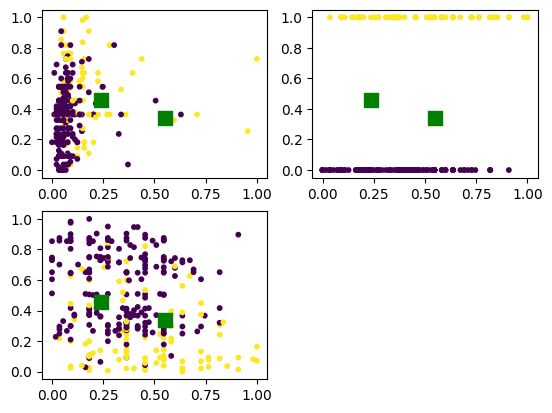

In [ ]:
#an additonal libary is added to represent the results of clustering
import matplotlib.pyplot as plt
#a K-means model with 2 clusters is created and trained using the dataset with 3 features
kmeans_model = KMeans(n_clusters=2, init = "k-means++").fit(clustering_dataset)
#acquiring cluster centers
centroids = kmeans_model.cluster_centers_
#make predictions for cluster membership of data objects
y_pred = kmeans_model.predict(clustering_dataset)
plt.subplot(2,2,1)                            # A 2 x 2 matrix of images is created, index starting with 1 in the top left corner
plt.scatter(norm_data['serum_creatinine'], clustering_dataset['age'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,2)                            # Create the next image in the matrix with index 2
plt.scatter(clustering_dataset['age'], clustering_dataset['DEATH_EVENT'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,3)                            # Create the next image in the matrix with index 3
plt.scatter(clustering_dataset['age'], clustering_dataset['time'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.show()

In [ ]:
#an additional library is needed to use the algorithm
from sklearn.cluster import AgglomerativeClustering
#creating an algorithm model, using a datset with 3 features
clustering = AgglomerativeClustering().fit(clustering_dataset)

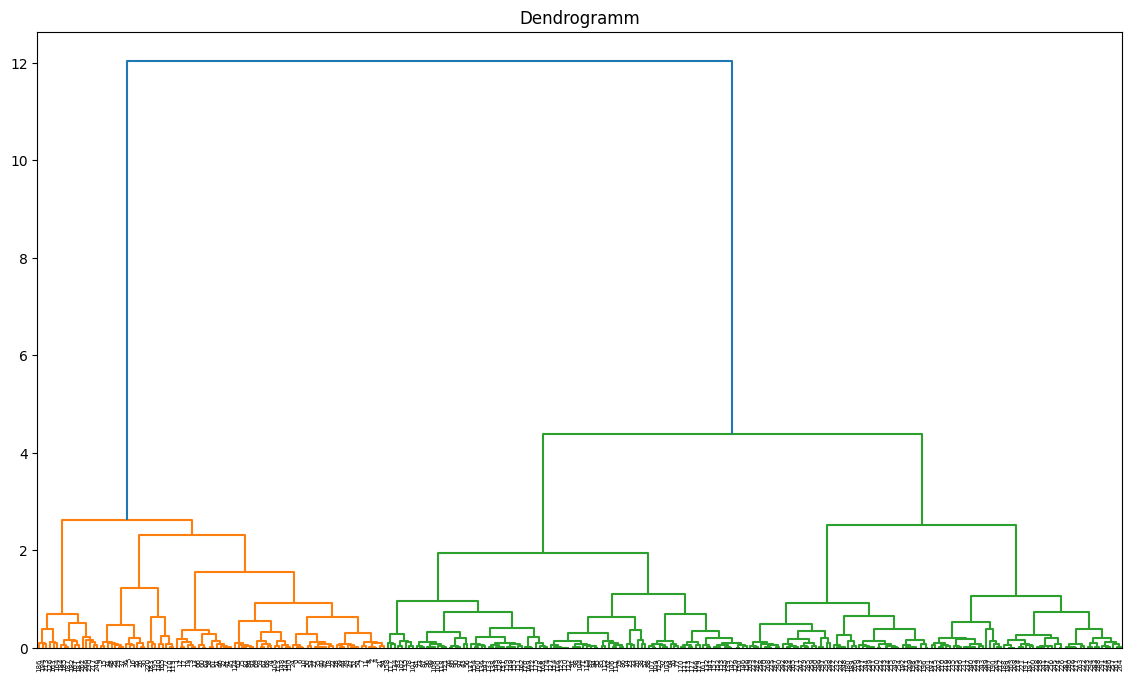

In [ ]:
#adding a library to represent a dendrogramm
import scipy.cluster.hierarchy as shc
#creating a dendrogramm using a linkage method "ward"
plt.figure(figsize =(14, 8))
plt.title('Dendrogramm')
Dendrogram = shc.dendrogram((shc.linkage(clustering_dataset, method ='ward')))

In [ ]:
from re import X
#importing a library for splitting the dataset into test and training dataset
from sklearn.model_selection import train_test_split
#saving the target values of the data objects, i.e. "penguin species", in a separate variable
targets = norm_data['DEATH_EVENT']
#specifying the proportion of data objects that will form the training dataset (70%)
training_proportion = 0.7
#splitting the dataset into test and training sets using a random 70:30 split
testinput = norm_data[['time','age']]
X_train, X_test, y_train, y_test = train_test_split(testinput, targets, test_size=1.0 - training_proportion, random_state=50)

In [ ]:
#importing a library to work with artificial neural networks
from sklearn.neural_network import MLPClassifier
#building an artificial neural network model with 2 layers, each containing 100 neurons
#The following parameters are set: the maximum number of training iterations is 1000, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
model1 = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1, )
model1.fit(X_train, y_train)

Iteration 1, loss = 0.77910660
Iteration 2, loss = 0.73572531
Iteration 3, loss = 0.66622411
Iteration 4, loss = 0.63596328
Iteration 5, loss = 0.64018208
Iteration 6, loss = 0.78070532
Iteration 7, loss = 0.62766912
Iteration 8, loss = 0.89529904
Iteration 9, loss = 0.62540707
Iteration 10, loss = 0.62641909
Iteration 11, loss = 0.64013247
Iteration 12, loss = 0.64024673
Iteration 13, loss = 0.63759770
Iteration 14, loss = 0.68534431
Iteration 15, loss = 0.62292207
Iteration 16, loss = 0.67960034
Iteration 17, loss = 0.69695727
Iteration 18, loss = 0.63310904
Iteration 19, loss = 0.62580970
Iteration 20, loss = 0.65717096
Iteration 21, loss = 0.63353405
Iteration 22, loss = 0.70958957
Iteration 23, loss = 0.62485116
Iteration 24, loss = 0.63463030
Iteration 25, loss = 0.62497924
Iteration 26, loss = 0.62311639
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        60
         1.0       0.00      0.00      0.00        30

    accuracy                           0.67        90
   macro avg       0.33      0.50      0.40        90
weighted avg       0.44      0.67      0.53        90



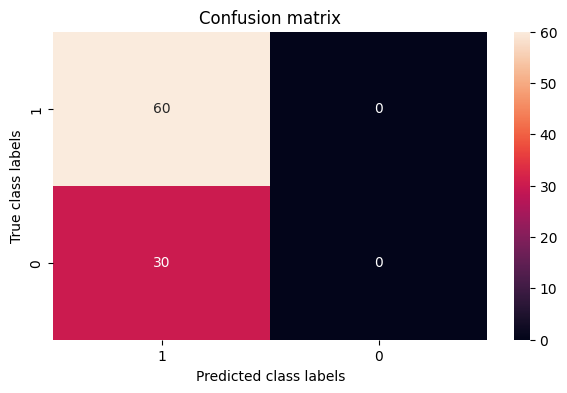

In [ ]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#we use the trained model with a test set to obtain predictions
y_predictions = model1.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(data['DEATH_EVENT'].unique());
ax.yaxis.set_ticklabels(data['DEATH_EVENT'].unique());

In [ ]:
#building an artificial neural network model with 1 layer and 5 neurons in it
#The following parameters are set: the maximum number of training iterations is 50, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
model2 = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
model2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        60
         1.0       1.00      0.10      0.18        30

    accuracy                           0.70        90
   macro avg       0.84      0.55      0.50        90
weighted avg       0.79      0.70      0.60        90



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

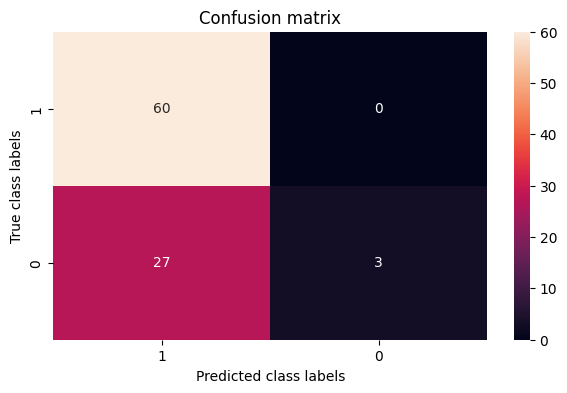

In [ ]:
#we use the trained model with a test set to obtain predictions
y_predictions_2 = model2.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_2, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(data['DEATH_EVENT'].unique());
ax.yaxis.set_ticklabels(data['DEATH_EVENT'].unique());

model2.predict(X_test)